# Spotify

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import pandas as pd
import time
from io import BytesIO
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Autenticación
auth_manager = SpotifyClientCredentials(client_id='12c366ecb9f6428d9881e02614df8c58', client_secret='85b9b36cedf24206858d538a9694c6a4') # API Gisela
sp = spotipy.Spotify(auth_manager=auth_manager)

**Extracción de Datos desde la API de Spotify.**

In [ ]:
años = range(2015, 2020)  # 2015, 2016, 2017, 2018, 2019
myoffset = range(0,150,50) 
generos = ['soundtrack','k-pop','electronic','afro']

In [ ]:
lista_canciones = [] # Creación de una lista para integrar todos los diccionarios que se generan en el bucle.

for g in generos:
    genres_dic = {}  # Creación de un diccionario por género.

    for año in años:
        for o in myoffset:
            print(f"Buscando {g} - {año} - offset {o}")
            datos = sp.search(q=f"genre:{g}, year:{año}", type="track", limit=50, offset=o)

            # acceso seguro a los datos
            tracks = datos.get('tracks', {}).get('items', [])

            for track in tracks:
                cancion = {
                    "id": track['id'],
                    "track_name": track['name'],
                    "artist_name": track['artists'][0]['name'],
                    "year": año,
                    "genre": g,
                    "album_type": track['album']['album_type'],
                    "release_date": track['album']['release_date'],
                    "popularity": track['popularity']
                } # Información de cada canción según los parametros explicitos

                lista_canciones.append(cancion)  # Agregación de cada canción extraida a la lista general
                genres_dic[track['id']] = cancion  # Contador de canciones por genero

    print(f"Total canciones para {g}: {len(genres_dic)}")


Buscando soundtrack - 2015 - offset 0
Buscando soundtrack - 2015 - offset 50
Buscando soundtrack - 2015 - offset 100
Buscando soundtrack - 2016 - offset 0
Buscando soundtrack - 2016 - offset 50
Buscando soundtrack - 2016 - offset 100
Buscando soundtrack - 2017 - offset 0
Buscando soundtrack - 2017 - offset 50
Buscando soundtrack - 2017 - offset 100
Buscando soundtrack - 2018 - offset 0
Buscando soundtrack - 2018 - offset 50
Buscando soundtrack - 2018 - offset 100
Buscando soundtrack - 2019 - offset 0
Buscando soundtrack - 2019 - offset 50
Buscando soundtrack - 2019 - offset 100
Total canciones para soundtrack: 750
Buscando k-pop - 2015 - offset 0
Buscando k-pop - 2015 - offset 50
Buscando k-pop - 2015 - offset 100
Buscando k-pop - 2016 - offset 0
Buscando k-pop - 2016 - offset 50
Buscando k-pop - 2016 - offset 100
Buscando k-pop - 2017 - offset 0
Buscando k-pop - 2017 - offset 50
Buscando k-pop - 2017 - offset 100
Buscando k-pop - 2018 - offset 0
Buscando k-pop - 2018 - offset 50
Busca

In [ ]:
genres_dic # Diccionario de canciones

{'7rQ6DH09HApIzk80dNSGEy': {'ID': '7rQ6DH09HApIzk80dNSGEy',
  'name': 'Baby Hello',
  'artist': 'Wande Coal',
  'Year': 2015,
  'Genero': 'afro',
  'album_type': 'album',
  'release_date': '2015-10-24',
  'popularity': 40},
 '5V7DFLUcl82jErKWngCon7': {'ID': '5V7DFLUcl82jErKWngCon7',
  'name': 'Não Vai',
  'artist': 'Djodje',
  'Year': 2015,
  'Genero': 'afro',
  'album_type': 'single',
  'release_date': '2015-12-07',
  'popularity': 44},
 '5bPpNuK3qgt1UbI18QEUYx': {'ID': '5bPpNuK3qgt1UbI18QEUYx',
  'name': 'Final (Baba Nla)',
  'artist': 'Wizkid',
  'Year': 2015,
  'Genero': 'afro',
  'album_type': 'single',
  'release_date': '2015-12-10',
  'popularity': 52},
 '0TlHywt8QI15kDuJd7SRnL': {'ID': '0TlHywt8QI15kDuJd7SRnL',
  'name': 'The Money',
  'artist': 'Davido',
  'Year': 2015,
  'Genero': 'afro',
  'album_type': 'single',
  'release_date': '2015-11-07',
  'popularity': 48},
 '0rauOsfmlYgBGkWFc4NHft': {'ID': '0rauOsfmlYgBGkWFc4NHft',
  'name': 'Number One',
  'artist': 'Boy Teddy',
  

In [ ]:
lista_canciones # Lista de diccionarios de canciones

[{'ID': '1WHNqqRWhJVZIdCScFKtl5',
  'name': 'Washington on Your Side',
  'artist': 'Leslie Odom Jr.',
  'Year': 2015,
  'Genero': 'soundtrack',
  'album_type': 'album',
  'release_date': '2015-09-25',
  'popularity': 67},
 {'ID': '1llkMtLL4vbe0pr3NV2ckg',
  'name': 'Let Me Hear',
  'artist': 'Fear, and Loathing in Las Vegas',
  'Year': 2015,
  'Genero': 'soundtrack',
  'album_type': 'album',
  'release_date': '2015-09-30',
  'popularity': 58},
 {'ID': '39IOkz6LpC1qc5Wnt0T07r',
  'name': 'Dance of the Druids (feat. Raya Yarbrough)',
  'artist': 'Bear McCreary',
  'Year': 2015,
  'Genero': 'soundtrack',
  'album_type': 'album',
  'release_date': '2015-02-10',
  'popularity': 53},
 {'ID': '5L9MJsGqzTRD09rSzHkCDy',
  'name': 'Home',
  'artist': 'Toby Fox',
  'Year': 2015,
  'Genero': 'soundtrack',
  'album_type': 'album',
  'release_date': '2015-09-15',
  'popularity': 62},
 {'ID': '0LpHC9mhPAQC98IjXZIrif',
  'name': 'The Election of 1800',
  'artist': 'Daveed Diggs',
  'Year': 2015,
  'Ge

In [ ]:
df = pd.DataFrame(lista_canciones) # Transformación en DataFrame

In [10]:
df

,ID,name,artist,Year,Genero,album_type,release_date,popularity
0,1WHNqqRWhJVZIdCScFKtl5,Washington on Your Side,Leslie Odom Jr.,2015,soundtrack,album,2015-09-25,67
1,1llkMtLL4vbe0pr3NV2ckg,Let Me Hear,"Fear, and Loathing in Las Vegas",2015,soundtrack,album,2015-09-30,58
2,39IOkz6LpC1qc5Wnt0T07r,Dance of the Druids (feat. Raya Yarbrough),Bear McCreary,2015,soundtrack,album,2015-02-10,53
3,5L9MJsGqzTRD09rSzHkCDy,Home,Toby Fox,2015,soundtrack,album,2015-09-15,62
4,0LpHC9mhPAQC98IjXZIrif,The Election of 1800,Daveed Diggs,2015,soundtrack,album,2015-09-25,66
...,...,...,...,...,...,...,...,...
2995,3wppK77a5W7pED0ChAeP4s,Zulu Screams (feat. Maleek Berry & Bibi Bourelly),GoldLink,2019,afro,album,2019-06-12,42
2996,3QGa7rzl3DFjLKnxGLLJ37,Tan Kalakatan - A COLORS SHOW,Mayra Andrade,2019,afro,single,2019-08-22,36
2997,6F5bERiTAIAVAP8ZUh0tqE,Different (feat. Damian Marley & Angelique Kidjo),Burna Boy,2019,afro,album,2019-07-25,41
2998,1Am00a8Tk3uEaMMToIYNQo,Jericho,Simi,2019,afro,album,2019-04-19,51


In [ ]:
df.to_csv("canciones_spotify.csv", index=False) # Extración de datos a CSV

In [ ]:
df_spotify = pd.read_csv("canciones_spotify.csv") # Lectura de CSV
df_spotify.head()

,ID,name,artist,Year,Genero,album_type,release_date,popularity
0,1WHNqqRWhJVZIdCScFKtl5,Washington on Your Side,Leslie Odom Jr.,2015,soundtrack,album,2015-09-25,67
1,1llkMtLL4vbe0pr3NV2ckg,Let Me Hear,"Fear, and Loathing in Las Vegas",2015,soundtrack,album,2015-09-30,58
2,39IOkz6LpC1qc5Wnt0T07r,Dance of the Druids (feat. Raya Yarbrough),Bear McCreary,2015,soundtrack,album,2015-02-10,53
3,5L9MJsGqzTRD09rSzHkCDy,Home,Toby Fox,2015,soundtrack,album,2015-09-15,62
4,0LpHC9mhPAQC98IjXZIrif,The Election of 1800,Daveed Diggs,2015,soundtrack,album,2015-09-25,66


In [ ]:
lista_artistas_spotify = df_spotify['artist'].tolist() # Creación de lista de artistas para ejecutar en archivo "artistas_LastFM.ipynb"

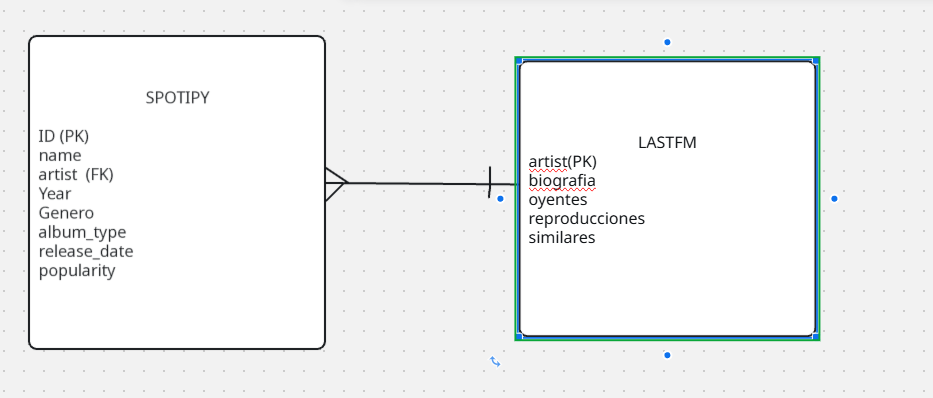